In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,log_loss,classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [18]:
df_attrition = pd.read_csv('sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [19]:
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<ipython-input-20-121953d401eb>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-121953d401eb>:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-121953d401eb>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-121953d401eb>:26: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-121953d401eb>:33: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-20-121953d401eb>

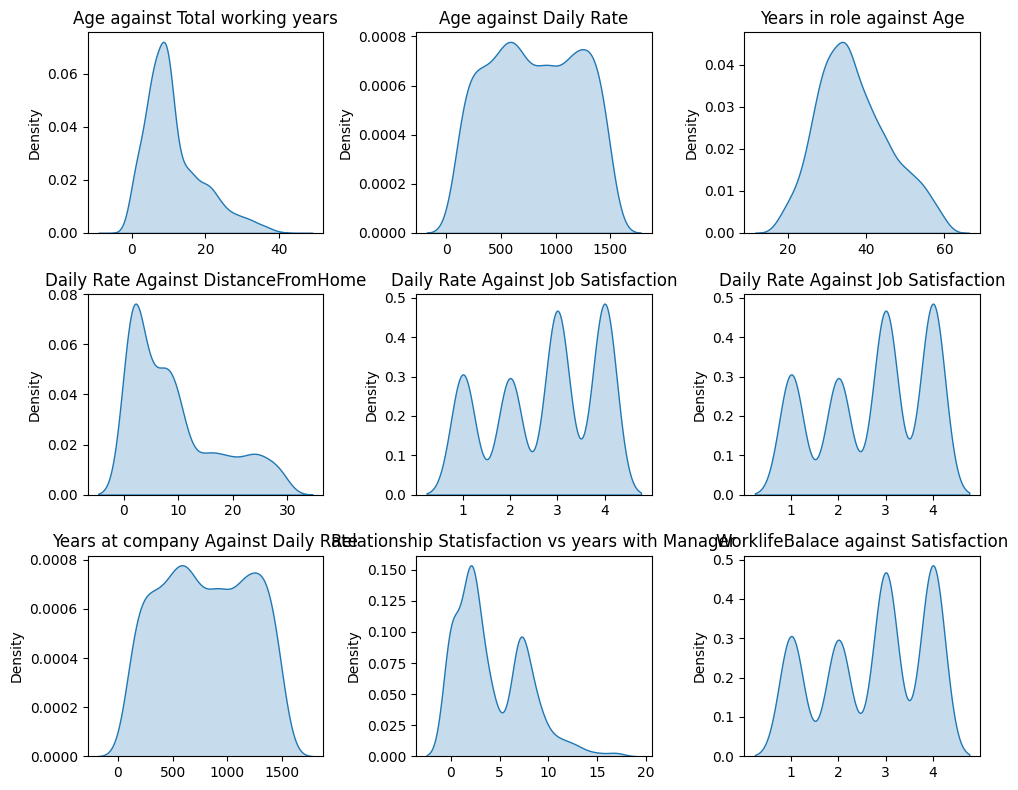

In [20]:
f , axes = plt.subplots(3,3,figsize=(10,8),sharex=False,sharey=False)

s = np.linspace(0,3,10)
cmap = sns.cubehelix_palette(start=0.0,light=1,as_cmap=True)

x = df_attrition['Age'].values
y = df_attrition['TotalWorkingYears'].values
sns.kdeplot(y,cmap=cmap,shade=True,cut=5,ax=axes[0,0])
axes[0,0].set(title='Age against Total working years')

cmap = sns.cubehelix_palette(start=0.3333333333 , light=1,as_cmap=True)
x = df_attrition['Age'].values
y = df_attrition['DailyRate'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[0,1])
axes[0,1].set(title='Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.6666666667 , light=1,as_cmap=True)
x = df_attrition['YearsInCurrentRole'].values
y = df_attrition['Age'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[0,2])
axes[0,2].set(title='Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0 , light=1,as_cmap=True)
x = df_attrition['DailyRate'].values
y = df_attrition['DistanceFromHome'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[1,0])
axes[1,0].set(title='Daily Rate Against DistanceFromHome')


cmap = sns.cubehelix_palette(start=1.333333333 , light=1,as_cmap=True)
x = df_attrition['DailyRate'].values
y = df_attrition['JobSatisfaction'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[1,1])
axes[1,1].set(title='Daily Rate Against Job Satisfaction')


cmap = sns.cubehelix_palette(start=1.666666667 , light=1,as_cmap=True)
x = df_attrition['YearsAtCompany'].values
y = df_attrition['JobSatisfaction'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[1,2])
axes[1,2].set(title='Daily Rate Against Job Satisfaction')

cmap = sns.cubehelix_palette(start=2.0 , light=1,as_cmap=True)
x = df_attrition['YearsAtCompany'].values
y = df_attrition['DailyRate'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[2,0])
axes[2,0].set(title='Years at company Against Daily Rate')

cmap = sns.cubehelix_palette(start=2.0 , light=1,as_cmap=True)
x = df_attrition['RelationshipSatisfaction'].values
y = df_attrition['YearsWithCurrManager'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[2,1])
axes[2,1].set(title='Relationship Statisfaction vs years with Manager')


cmap = sns.cubehelix_palette(start=2.0 , light=1,as_cmap=True)
x = df_attrition['WorkLifeBalance'].values
y = df_attrition['JobSatisfaction'].values
sns.kdeplot(y,cmap=cmap,shade=True,ax=axes[2,2])
axes[2,2].set(title='WorklifeBalace against Satisfaction')


f.tight_layout()






In [21]:
target_map = {'Yes':1,'No':0}

df_attrition['Attrition_numerical'] = df_attrition['Attrition'].apply(lambda x:target_map[x])

numerical = [u'Age',u'DailyRate',u'DistanceFromHome',
             u'Education',u'EmployeeNumber',u'EnvironmentSatisfaction',
             u'HourlyRate',u'JobInvolvement',u'JobLevel',u'JobSatisfaction',
             u'MonthlyIncome',u'MonthlyRate',u'NumCompaniesWorked',
             u'PercentSalaryHike',u'PerformanceRating',u'RelationshipSatisfaction',
             u'StockOptionLevel',u'TotalWorkingYears',
             u'TrainingTimesLastYear',u'WorkLifeBalance',u'YearsAtCompany',
             u'YearsInCurrentRole',u'YearsSinceLastPromotion',u'YearsWithCurrManager']

data = [
    go.Heatmap(
        z=df_attrition[numerical].astype(float).corr().values,
        x=df_attrition[numerical].columns.values,
        y=df_attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale=False,
        opacity=1.0

    )
]

layout = go.Layout(
    title='Pearson Correlation of Numerical Features',
    xaxis = dict(ticks='',nticks=36),
    yaxis=dict(ticks=''),
    width=900,height=700,
)

fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='labelled-heatmap')

In [28]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [29]:
attrition = df_attrition.drop(['Attrition_numerical'],axis=1)

categorical = []
for col,value in df_attrition.iteritems():
  if value.dtype == 'object':
    categorical.append(col)

numerical = df_attrition.columns.difference(categorical)

In [30]:
attrition_cat = df_attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'],axis=1)
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = df_attrition[numerical]
attrition_final = pd.concat([attrition_num,attrition_cat],axis=1)

In [31]:
target_map = {'Yes':1,'No':0}

target = attrition['Attrition'].apply(lambda x:target_map[x])

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit


train,test,target_train,target_val = train_test_split(attrition_final,
                                                      target,
                                                      train_size=0.80,
                                                      random_state=0);


In [38]:
oversampler = SMOTE(random_state=0)

smote_train,smote_target = oversampler.fit_resample(train,target_train)

seed = 0

rf_params = {
    'n_jobs':-1,
    'n_estimators':1000,
    'max_features':0.3,
    'max_depth':4,
    'min_samples_leaf':2,
    'max_features':'sqrt',
    'random_state':seed,
    'verbose':0
}

rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train,smote_target)
rf_predictions = rf.predict(test)
print("Accuracy score : {}".format(accuracy_score(target_val,rf_predictions)))
print("="*80)
print(classification_report(target_val,rf_predictions))

Accuracy score : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00        49

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [43]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale = 'Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)

data = [trace]

layout = go.Layout(
    autosize=True,
    title='Random Forest Feataure Importance',
    hovermode = 'closest',
    xaxis =dict(
        ticklen=5,
        showgrid=False,
        zeroline=False,
        showline=False
    ),
    yaxis=dict(
        title = 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen=5,
        gridwidth=2
    ),
    showlegend=False
)
fig = go.Figure(data=data,layout=layout)
py.iplot(fig,filename='scatter2010')